# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dinar Ferdiansyah
- **Email:** dinarferdiansyah331@gmail.com
- **ID Dicoding:** arsyaa11

## Menentukan Pertanyaan Bisnis

- Bagaimana hasil clustering menggunakan algoritma K-Means untuk data jumlah peminjaman sepeda per musim?
- Bagaimana pengaruh sebuah musim terhadap jumlah peminjaman sepeda?
- Berapa jumlah rata-rata peminjaman sepeda per jamnya?
- Bagaimana pengaruh hari libur terhadap jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/arsyaa11/Bike-Sharing/main/Data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/arsyaa11/Bike-Sharing/main/Data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai tabel **day_df**

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut seharusnya direpresentasikan sebagai tipe data datetime, bukan object.

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada Missing Value.

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada data duplikasi, yang berarti semua data bersifat unik.

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak ada keanehan pada nilai statistiknya.

Menilai tabel **hour_df**

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut seharusnya direpresentasikan sebagai tipe data datetime, bukan object.

In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada Missing Value.

In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada data duplikasi, yang berarti semua data bersifat unik.

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak ada keanehan pada nilai statistiknya

### Cleaning Data

In [12]:
#Mengubah beberapa detail tentang kolom pada day_df
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
#Mengubah beberapa detail tentang kolom pada hour_df
hour_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count',
    'hr' : 'hour'
}, inplace=True)

hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [14]:
# Mengubah angka pada day_df menjadi keterangan
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weather_cond'] = day_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [15]:
# Mengubah angka pada hour_df menjadi keterangan
hour_df['month'] = hour_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
hour_df['weather_cond'] = hour_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [16]:
# Mengubah tipe data ke datetime
day_df['dateday'] = pd.to_datetime(day_df.dateday)

# Mengubaha tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_cond'] = day_df.weather_cond.astype('category')

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [17]:
# Mengubah tipe data ke datetime
hour_df['dateday'] = pd.to_datetime(hour_df.dateday)

# Mengubaha tipe data ke categorical
hour_df['season'] = hour_df.season.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weather_cond'] = hour_df.weather_cond.astype('category')

hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,Jan,0,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,Jan,1,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,Jan,2,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,Jan,3,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,Jan,4,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [18]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       731 non-null    int64         
 1   dateday       731 non-null    datetime64[ns]
 2   season        731 non-null    category      
 3   year          731 non-null    category      
 4   month         731 non-null    category      
 5   holiday       731 non-null    category      
 6   weekday       731 non-null    category      
 7   workingday    731 non-null    category      
 8   weather_cond  731 non-null    category      
 9   temp          731 non-null    float64       
 10  atemp         731 non-null    float64       
 11  hum           731 non-null    float64       
 12  windspeed     731 non-null    float64       
 13  casual        731 non-null    int64         
 14  registered    731 non-null    int64         
 15  count         731 non-null    int64     

In [19]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       17379 non-null  int64         
 1   dateday       17379 non-null  datetime64[ns]
 2   season        17379 non-null  category      
 3   year          17379 non-null  category      
 4   month         17379 non-null  category      
 5   hour          17379 non-null  int64         
 6   holiday       17379 non-null  category      
 7   weekday       17379 non-null  category      
 8   workingday    17379 non-null  category      
 9   weather_cond  17379 non-null  category      
 10  temp          17379 non-null  float64       
 11  atemp         17379 non-null  float64       
 12  hum           17379 non-null  float64       
 13  windspeed     17379 non-null  float64       
 14  casual        17379 non-null  int64         
 15  registered    17379 non-null  int64 

Tipe data dteday sudah berubah menjadi datetime.

## Exploratory Data Analysis (EDA)

### Explore ...

In [20]:
print(pd.unique(day_df['season']))

['Spring', 'Summer', 'Fall', 'Winter']
Categories (4, object): ['Fall', 'Spring', 'Summer', 'Winter']


In [21]:
season_analysis_day = day_df.iloc[:, [2, 13, 14, 15]]
season_analysis_day.groupby('season').sum()


,casual,registered,count
season,,,
Fall,226091,835038,1061129
Spring,60622,410726,471348
Summer,203522,715067,918589
Winter,129782,711831,841613


Dari hasil di atas, dapat disimpulkan para penyewa sepeda paling banyak menyewa pada saat musim gugur.

In [22]:
print(pd.unique(day_df['holiday']))

[0, 1]
Categories (2, int64): [0, 1]


In [23]:
holiday_analysis_day = day_df.iloc[:,[5, 13, 14, 15]]
holiday_analysis_day.groupby('holiday').sum()

,casual,registered,count
holiday,,,
0,597658,2616586,3214244
1,22359,56076,78435


In [24]:
libur = ['Tidak Libur', 'Libur']

In [25]:
holiday_analysis_day['holiday'] = holiday_analysis_day['holiday'].replace([0, 1], libur)

<ipython-input-25-343ac1e4376c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holiday_analysis_day['holiday'] = holiday_analysis_day['holiday'].replace([0, 1], libur)


In [26]:
holiday_analysis_day_result = holiday_analysis_day.groupby('holiday').sum()
holiday_analysis_day_result

,casual,registered,count
holiday,,,
Tidak Libur,597658,2616586,3214244
Libur,22359,56076,78435


Dari hasil di atas, dapat disimpulkan bahwa para penyewa sepeda paling banyak menyewa pada saat tidak libur.

In [27]:
hour_df.groupby('hour')['count'].mean().reset_index()

,hour,count
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


Dapat dilihat bahwa data di atas menunjukkan rata-rata penyewa sepeda tiap jamnya.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [28]:
#Penggunaan clustering untuk menjawab pertanyaan nomer 1
from sklearn.cluster import KMeans

#Feature yang akan digunakan
df_hour = hour_df[['hour', 'count']]
df_hour.head()

,hour,count
0,0,16
1,1,40
2,2,32
3,3,13
4,4,1


In [29]:
#Penerapan K-Means clustering
# membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(df_hour)
  clusters.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

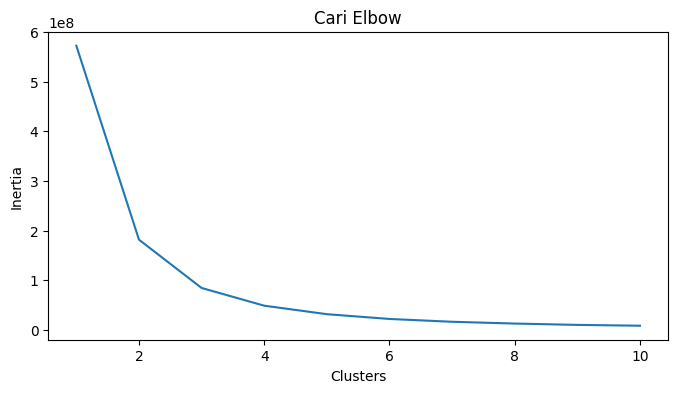

In [30]:
%matplotlib inline

# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-34-971a44cd95fd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hour['Labels'] = km4.labels_


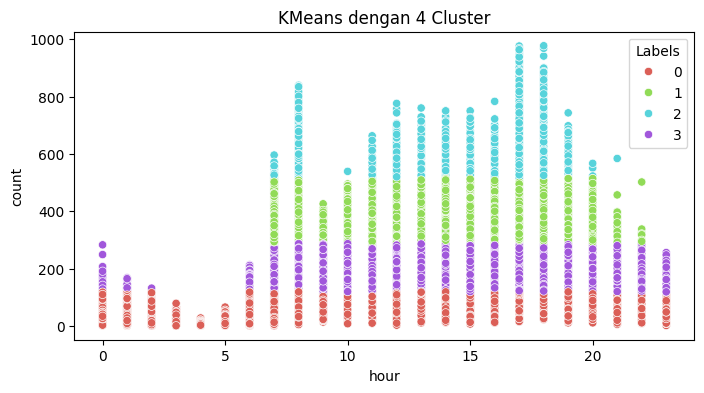

In [34]:
# membuat objek KMeans
km4 = KMeans(n_clusters=4).fit(df_hour)

# menambahkan kolom label pada dataset
df_hour['Labels'] = km4.labels_

# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(data=df_hour, x='hour', y='count', hue='Labels',
                palette=sns.color_palette('hls', 4))
plt.title('KMeans dengan 4 Cluster')
plt.show()

Hasilnya terdapat 4 cluster per jamnya setelah menganalisis menggunakan K-Means, dimana mencari elbow point dari plot inertia untuk menentukan jumlah cluster yang optimal.

In [35]:
#Menghitung rata-rata jumlah peminjaman sepeda untuk setiap kluster
cluster_means = df_hour.groupby('Labels')['count'].mean()

print(cluster_means)

Labels
0     43.018443
1    381.333893
2    647.565957
3    195.731685
Name: count, dtype: float64


Dapat dilihat bahwa cluster di untuk total penjualan di atas 500 mempunyai rata-rata peminjaman sepeda tertinggi dibandingkan yang lain.

### Pertanyaan 2:

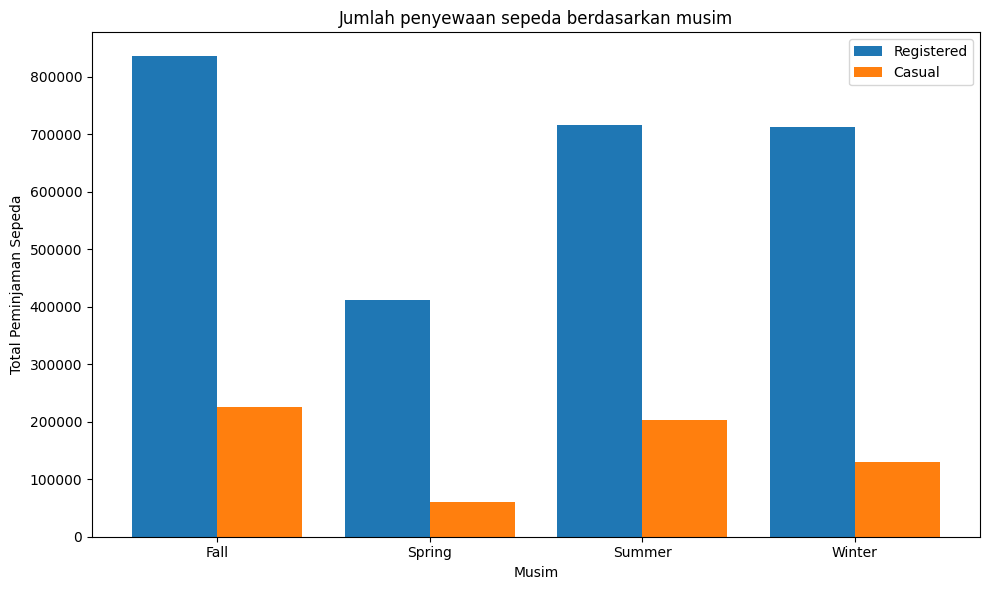

In [33]:
# Mengelompokkan data berdasarkan musim dan menghitung jumlah penggunaan terdaftar dan tidak terdaftar
seasonal_usage = season_analysis_day.groupby('season')[['registered', 'casual', 'count']].sum().reset_index()

plt.figure(figsize=(10, 6))

# Menentukan lebar setiap bar
bar_width = 0.4

# Membuat
season_index = np.arange(len(seasonal_usage['season']))
plt.bar(
    season_index - bar_width/2,
    seasonal_usage['registered'],
    width=bar_width,
    label='Registered',
    color='tab:blue'
)

plt.bar(
    season_index + bar_width/2,
    seasonal_usage['casual'],
    width=bar_width,
    label='Casual',
    color='tab:orange'
)

plt.xlabel('Musim')
plt.ylabel('Total Peminjaman Sepeda')
plt.title('Jumlah penyewaan sepeda berdasarkan musim')
plt.xticks(season_index, seasonal_usage['season'])  # Set label sumbu x
plt.legend()
plt.tight_layout()
plt.show()


Dari barplot di atas, dapat dilihat bahwa pada musim gugur (fall) menghasilkan total peminjaman paling banyak dan musim panas menghasilkan total peminjaman paling sedikit.

### Pertanyaan 3:

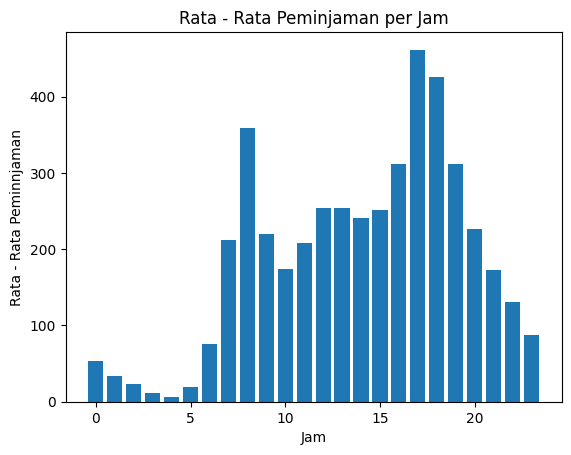

In [36]:
#Visualisasi
rental_jam = hour_df.groupby('hour')['count'].mean()

plt.bar(rental_jam.index, rental_jam.values, color='#1f77b4')

plt.title('Rata - Rata Peminjaman per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata - Rata Peminnjaman')

plt.show()

Dari barplot di atas, dapat dilihat bahwa pada pukul 17.00 dan 18.00 memiliki rata-rata peminjaman tertinggi dan 04.00 memiliki rata-rata peminjaman terendah.

### Pertanyaan 4:

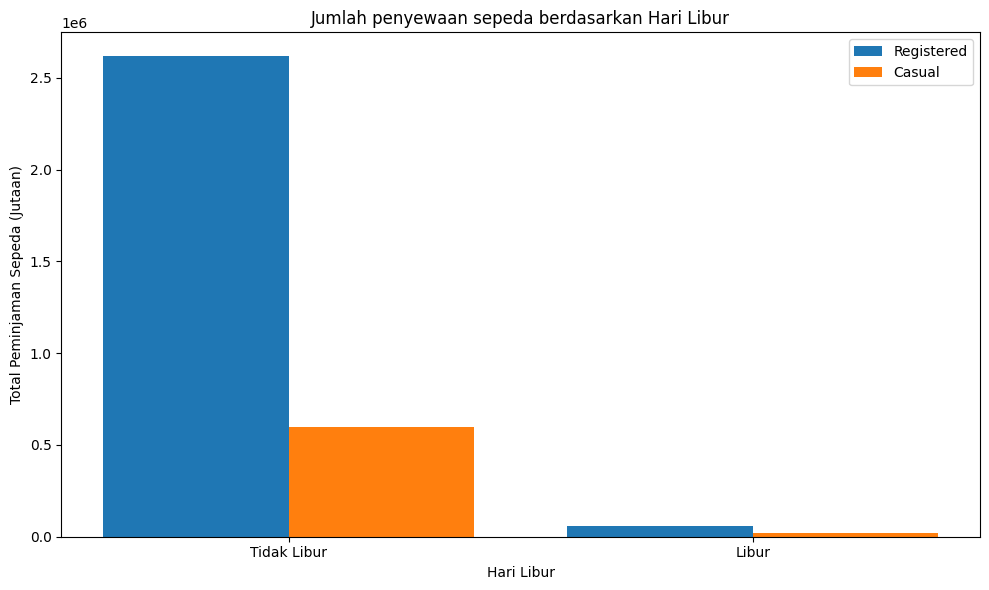

In [37]:
# Mengelompokkan data berdasarkan musim dan menghitung jumlah penggunaan terdaftar dan tidak terdaftar
holiday_usage = holiday_analysis_day.groupby('holiday')[['registered', 'casual', 'count']].sum().reset_index()

plt.figure(figsize=(10, 6))

# Menentukan lebar setiap bar
bar_width = 0.4

# Membuat
holiday_index = np.arange(len(holiday_usage['holiday']))
plt.bar(
    holiday_index - bar_width/2,
    holiday_usage['registered'],
    width=bar_width,
    label='Registered',
    color='tab:blue'
)

plt.bar(
    holiday_index + bar_width/2,
    holiday_usage['casual'],
    width=bar_width,
    label='Casual',
    color='tab:orange'
)

plt.xlabel('Hari Libur')
plt.ylabel('Total Peminjaman Sepeda (Jutaan)')
plt.title('Jumlah penyewaan sepeda berdasarkan Hari Libur')
plt.xticks(holiday_index, holiday_usage['holiday'])  # Set label sumbu x
plt.legend()
plt.tight_layout()
plt.show()


Dari barplot di atas, dapat dilihat bahwa terjadi perbedaan yang sangat signifikan dalam peminjaman sepeda saat hari libur dan tidak libur.

## Conclusion

- **Conclution pertanyaan 1:**
Hasil clustering menggunakan K-Means menghasilkan 4 klaster per musim setelah mencari elbow point dari plot inertia. Hal ini menunjukkan bahwa data jumlah peminjaman sepeda per musim dapat dibagi menjadi 4 kelompok yang berbeda berdasarkan pola peminjamannya.

- **Conclution pertanyaan 2:**
Dari visualisasi menggunakan bar plot, terlihat bahwa musim gugur (fall) memiliki total peminjaman sepeda paling tinggi dibandingkan dengan musim lainnya, sementara musim panas memiliki total peminjaman paling rendah. Hal ini menunjukkan adanya perbedaan pola peminjaman sepeda tergantung pada musimnya. Kemungkinan faktor-faktor seperti cuaca dan aktivitas musiman memengaruhi minat masyarakat untuk menggunakan sepeda sebagai sarana transportasi atau rekreasi.

- **Conclution pertanyaan 3:**
Rata-rata peminjaman sepeda tertinggi terjadi pada jam 17:00 dan 18:00, sementara pukul 04:00 memiliki rata-rata peminjaman terendah. Hal ini mengindikasikan bahwa terdapat pola tertentu dalam aktivitas peminjaman sepeda sepanjang hari, dengan puncak aktivitas terjadi di sore hari saat orang-orang pulang kerja atau sekolah. Peminjaman sepeda pada pagi hari juga cukup tinggi, yang mungkin mencerminkan penggunaan sepeda sebagai sarana transportasi menuju tempat kerja atau sekolah.

- **Conclution pertanyaan 4:**
Dari analisis, terlihat bahwa terdapat perbedaan yang signifikan dalam total peminjaman sepeda saat hari libur dan hari tidak libur. Pada hari kerja, terjadi penyewaan sepeda yang lebih tinggi dibandingkan dengan hari libur. Hal ini mungkin disebabkan oleh kebutuhan transportasi sehari-hari penduduk yang lebih tinggi pada hari kerja, sedangkan pada hari libur, minat masyarakat untuk menggunakan sepeda sebagai sarana rekreasi atau aktivitas hobi mungkin lebih tinggi.